# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce_preparados.csv')

---

Gráfico de Dispersão

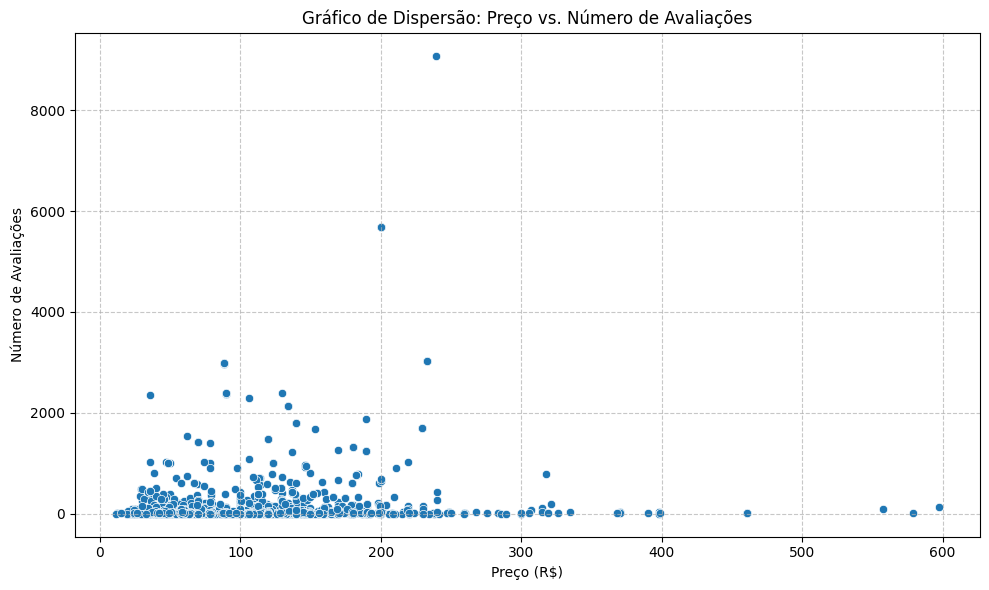

In [ ]:
df_scatter = df.dropna(subset=['Preço', 'N_Avaliações'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Preço', y='N_Avaliações', data=df_scatter)
plt.title('Gráfico de Dispersão: Preço vs. Número de Avaliações')
plt.xlabel('Preço (R$)')
plt.ylabel('Número de Avaliações')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()



Neste gráfico podemos perceber que a maioria dos produtos se concentra entre 0 reais e 300 reais, uma média de avaliações modesta o que é comum para e-commerce, o que significa que o numero de avaliações não está relacionada ao preço do produto

---

Mapa de Calor


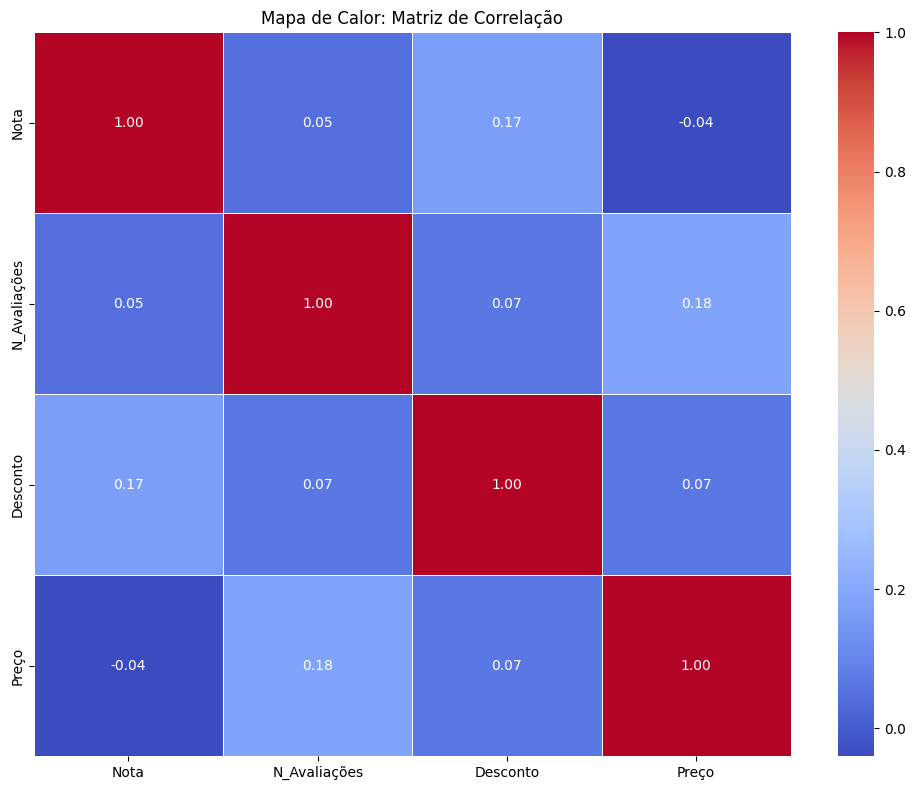

In [5]:
numerical_cols = ['Nota', 'N_Avaliações', 'Desconto', 'Preço']

df_heatmap = df.dropna(subset=numerical_cols)

correlation_matrix = df_heatmap[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor: Matriz de Correlação')
plt.tight_layout()

Utilizei esse gráfico para identificar alguma correlação alta entre as variaveis porém sem sucesso, a maior correlação que temos é 0.17 e 0.18 o que é um valor baixo

---

Gráfico de Barra

<ipython-input-9-ab77911989da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gênero', y='Count', data=contar_generos, palette='viridis')


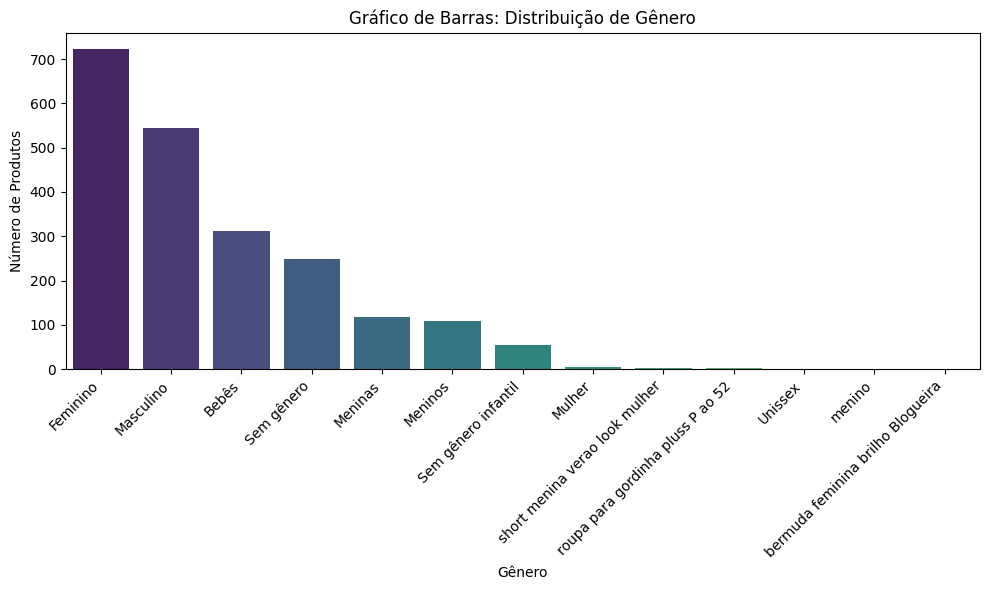

In [9]:
df_bar = df.dropna(subset=['Gênero'])

contar_generos = df_bar['Gênero'].value_counts().reset_index()
contar_generos.columns = ['Gênero', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Gênero', y='Count', data=contar_generos, palette='viridis')
plt.title('Gráfico de Barras: Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Aqui podemos ver um claro erro de tratamento de dados, aonde deveria ter apenas generos temos valores totalmente errados, vamos tratar esses valores e mostrar novamente o gráfico

In [39]:
df['Gênero'].unique()

# Excluir linhas onde 'Gênero' é nulo (NaN)
df.dropna(subset=['Gênero'])

# Excluir valores que não são Gêneros
generos_para_excluir = ['SHORT MENINA VERAO LOOK MULHER', 'ROUPA PARA GORDINHA PLUSS P AO 52', 'BERMUDA FEMININA BRILHO BLOGUEIRA'] # Adicione outros que você identificou
df = df[~df['Gênero'].isin(generos_para_excluir)]

df['Gênero'] = df['Gênero'].str.upper()
df['Gênero'] = df['Gênero'].replace('SEM GÊNERO INFANTIL', 'SEM GÊNERO')
df['Gênero'] = df['Gênero'].replace('MENINO', 'MENINOS')
df['Gênero'] = df['Gênero'].replace('MULHER', 'FEMININO')

df['Gênero'].unique()

array(['SEM GÊNERO', 'MASCULINO', 'FEMININO', 'MENINAS', 'BEBÊS',
       'MENINOS', nan, 'UNISSEX'], dtype=object)

<ipython-input-40-ab77911989da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gênero', y='Count', data=contar_generos, palette='viridis')


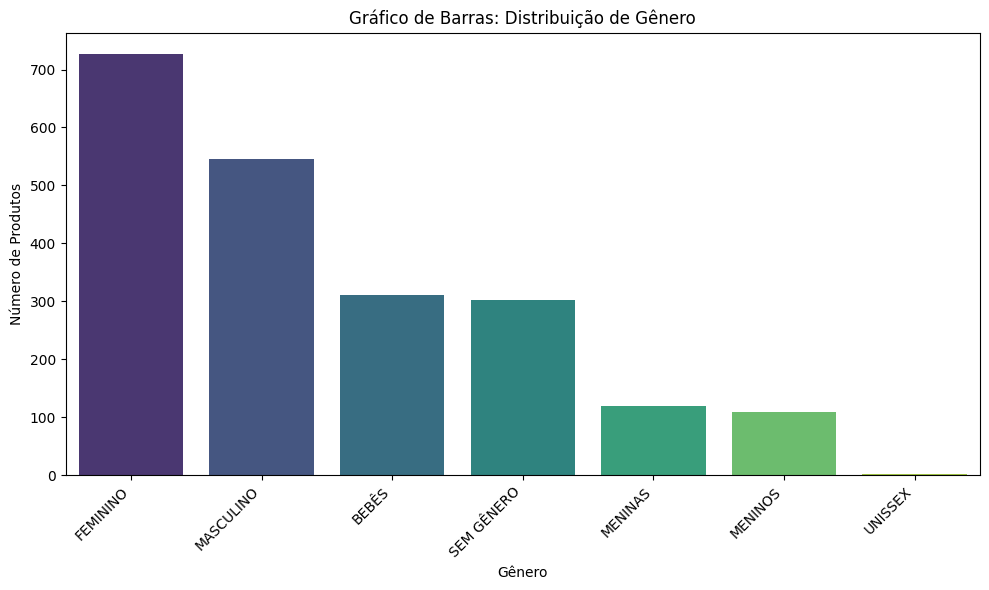

In [40]:
df_bar = df.dropna(subset=['Gênero'])

contar_generos = df_bar['Gênero'].value_counts().reset_index()
contar_generos.columns = ['Gênero', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Gênero', y='Count', data=contar_generos, palette='viridis')
plt.title('Gráfico de Barras: Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Agora depois da limpeza podemos ter uma ideia melhor, as mulheres são as que mais compram produtos, também podemos perceber que temos um erro de como recebemos os dados, os clientes estão se confundindo se devem colocar o seu gênero ou o do seu bebê, indicaria revisar a pergunta feita para deixar claro que é o dado do cliente, e podemos inserir um campo para receber o dado do bebê para projeção futura de novos produtos e etc focado nos dados

---

Gráfico de Pizza

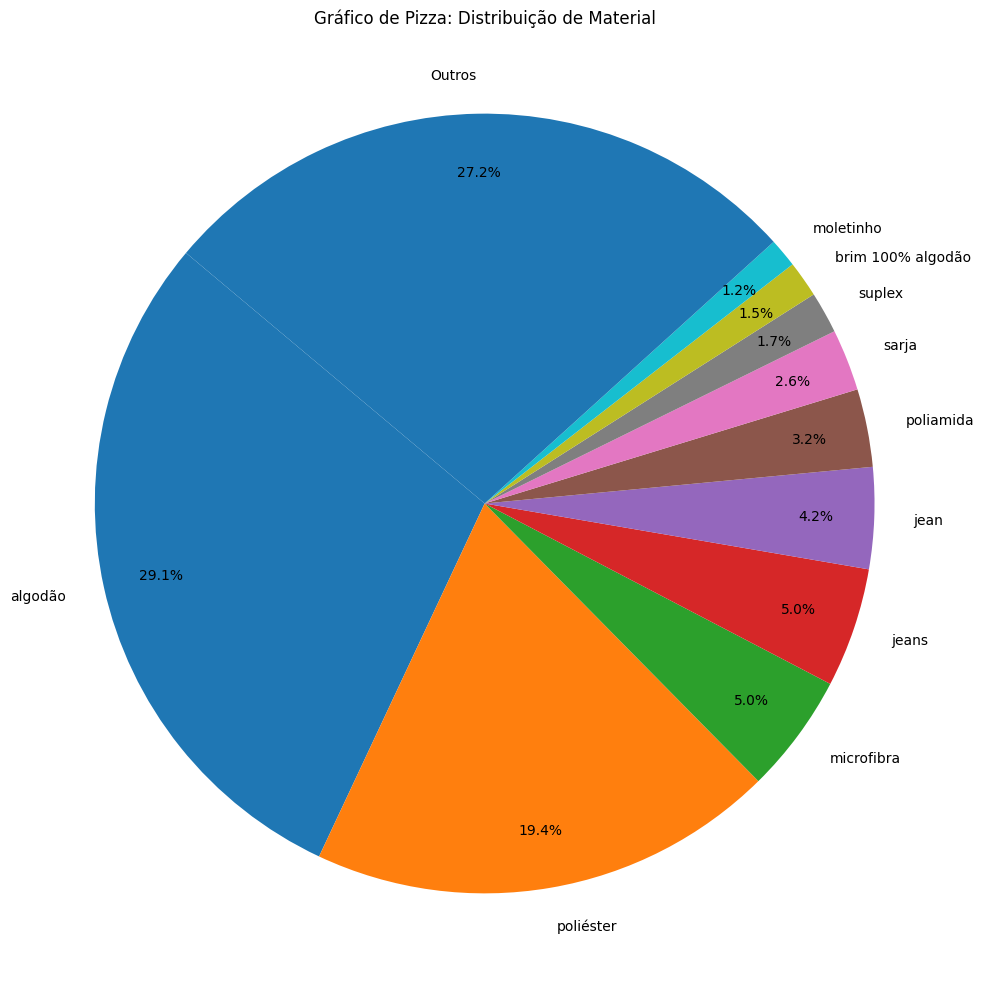

In [12]:
df_pie = df.dropna(subset=['Material'])

contar_materiais = df_pie['Material'].value_counts()

# Selecionar os top N materiais e agrupar o restante em 'Outros' para melhor visualização
top_n = 10
if len(contar_materiais) > top_n:
    contar_outros = contar_materiais.iloc[top_n:].sum()
    contar_materiais = contar_materiais.iloc[:top_n]
    contar_materiais['Outros'] = contar_outros

plt.figure(figsize=(10, 10))
plt.pie(contar_materiais, labels=contar_materiais.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Gráfico de Pizza: Distribuição de Material')
plt.axis('equal')
plt.tight_layout()


Aqui podemos ver que o material que os clientes mais buscam é o de algodão, justamente por ser mais macio e mais fresco, já em segundo vem o poliéster que é mais barato porém menos confortavel e mais quente que o algodão

---

Gráfico de Densidade

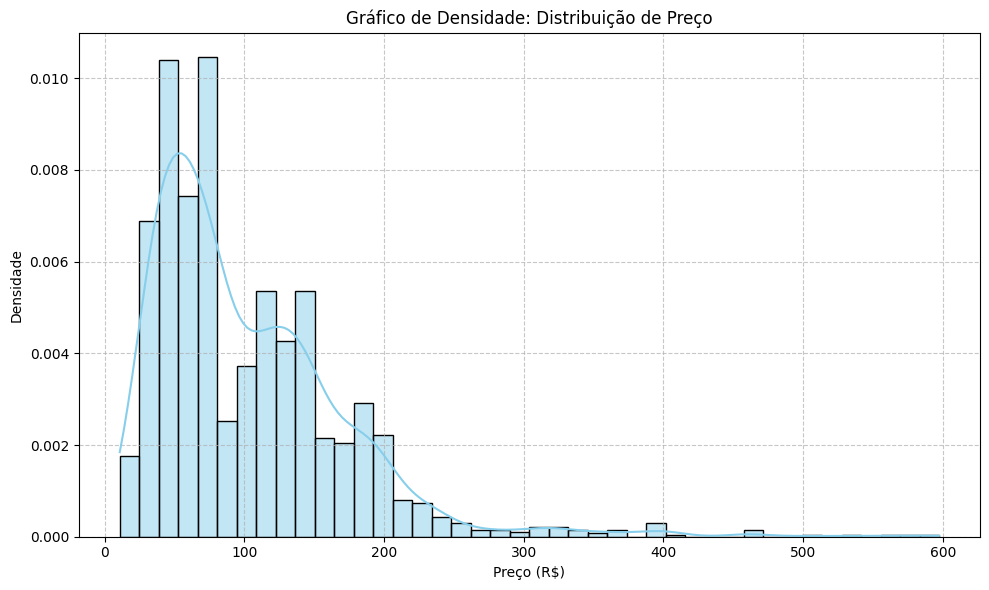

In [13]:
df_density = df.dropna(subset=['Preço'])

plt.figure(figsize=(10, 6))
sns.histplot(df_density['Preço'], kde=True, stat='density', color='skyblue')
plt.title('Gráfico de Densidade: Distribuição de Preço')
plt.xlabel('Preço (R$)')
plt.ylabel('Densidade')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

Aqui vemos que nossos preços estão bem concentrados até 200 reais, talvez se a empresa quiser atingir outros públicos podemos ampliar essa gama de produtos para produtos mais caros.